In [1]:
# necessary imports for pipeline
import numpy as np
import cv2
import glob
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

undistorted images


[]

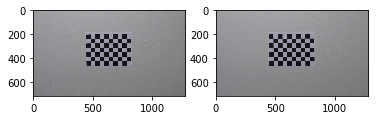

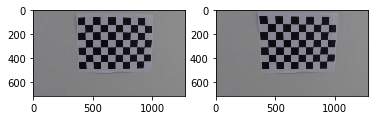

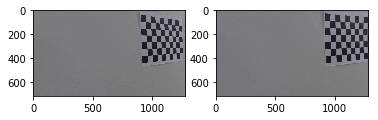

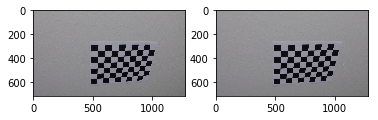

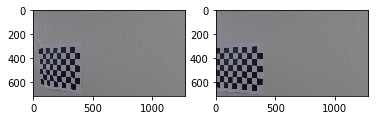

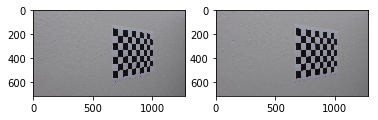

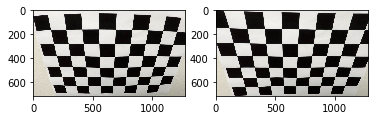

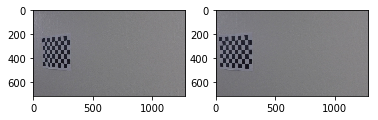

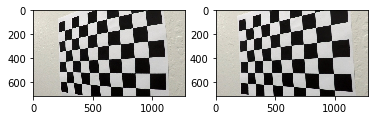

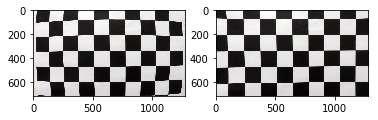

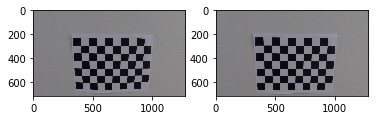

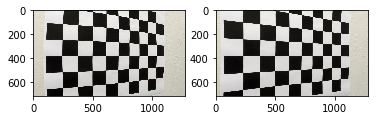

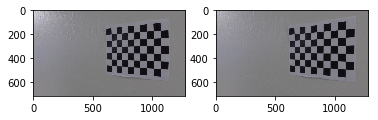

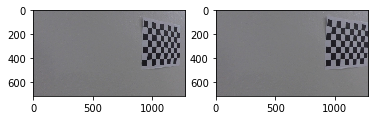

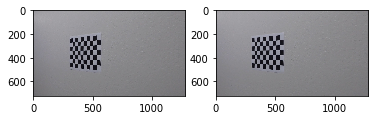

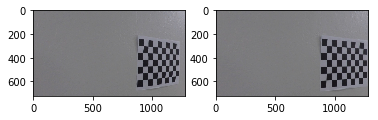

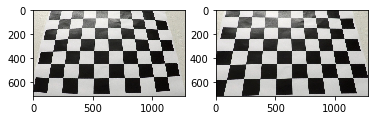

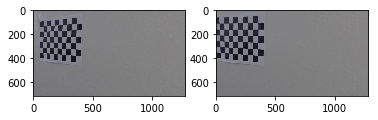

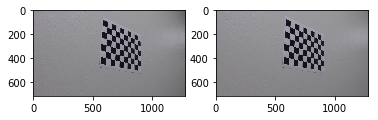

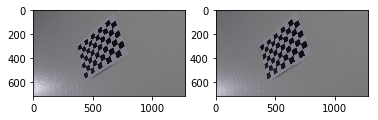

In [3]:
###################################
# camera calibration block
###################################

# generator to provide the list of calibration images
def calib_img_generator(calib_img_dir="camera_cal"):
    for img_path in glob.glob(calib_img_dir + "/*.jpg"):
        yield img_path, mpimg.imread(img_path)

# calibrates camera from the provided params and returns the calibration matrix & distortion vectors
def calibrate_camera(corner_rows, corner_cols, calib_img_dir):
    objpoints = []
    imgpoints = []

    objp = np.zeros((corner_rows*corner_cols, 3), np.float32)
    objp[:,:2] = np.mgrid[0:corner_cols,0:corner_rows].T.reshape(-1,2)
    
    # get calibration data
    for path, img in calib_img_generator(calib_img_dir):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (corner_cols,corner_rows), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            # img_corners = cv2.drawChessboardCorners(img, (corner_cols,corner_rows), corners, ret)
 
    # calibrate
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    return mtx, dist

# provided the distorting matrix & constants, returns an undistorted image
def undistort(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

# perform camera calibration
mtx, dist = calibrate_camera(corner_rows=6, corner_cols=9, calib_img_dir="./camera_cal")

# tesst undistortion on sample images
print("undistorted images")
for path, img in calib_img_generator(calib_img_dir="./camera_cal"):
    fig, plots = plt.subplots(nrows=1,ncols=2)
    plots[0].imshow(img)
    dst = undistort(img, mtx, dist)
    plots[1].imshow(dst)
    cv2.imwrite(os.path.splitext(path)[0] + '_undistorted.jpg', dst)

plt.plot()

